<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_PyTorchTraining/blob/main/IG_SimpleAutoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch

In [2]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5))
])

train_data = torchvision.datasets.MNIST('dataset/train', train=True,
                                        transform = transforms,
                                        download=True)

test_data = torchvision.datasets.MNIST('dataset/test', train=False,
                                        transform = transforms,
                                        download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 99401357.63it/s]


Extracting dataset/train/MNIST/raw/train-images-idx3-ubyte.gz to dataset/train/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30276354.37it/s]


Extracting dataset/train/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/train/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26531518.74it/s]


Extracting dataset/train/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/train/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13284887.56it/s]

Extracting dataset/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/train/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 100894533.33it/s]

Extracting dataset/test/MNIST/raw/train-images-idx3-ubyte.gz to dataset/test/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 28375660.30it/s]

Extracting dataset/test/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/test/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24213610.38it/s]


Extracting dataset/test/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/test/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9347658.87it/s]

Extracting dataset/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/test/MNIST/raw



In [3]:
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=64
)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=64
)

In [10]:
train_data[0][0].numpy().shape

(1, 28, 28)

In [4]:
random_samples = np.random.randint(0,len(train_data), 25)

In [5]:
random_samples

array([45288, 18664, 49129, 41811, 31657, 35206, 21733, 45488, 30453,
       13764, 26651, 25686, 57453, 46935, 51748, 33779, 46870,  6943,
       35487, 34735, 25526, 55635, 57618,   529, 28035])

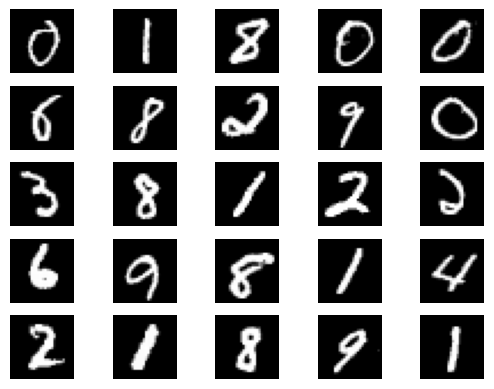

In [13]:
for i, img_indx in enumerate(random_samples):
  plt.subplot(5,5, i+1)
  plt.imshow(train_data[img_indx][0][0], cmap="gray")
  plt.axis('off')

plt.show()

In [19]:
class AutoEncoders(torch.nn.Module):
  def __init__(self, image_size=28):
    super().__init__()
    N = image_size ** 2 # 784 for MNIST data
    self.encoder = torch.nn.Sequential(
        torch.nn.Linear(N, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 10),
    )

    self.decoder = torch.nn.Sequential(
        torch.nn.Linear(10, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, N),
        torch.nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [20]:
model = AutoEncoders()

In [22]:
model.to('cpu')

AutoEncoders(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

In [24]:
# !pip install torchview

In [31]:
# !pip install graphviz

In [32]:
import graphviz

graphviz.set_jupyter_format('png')

'svg'

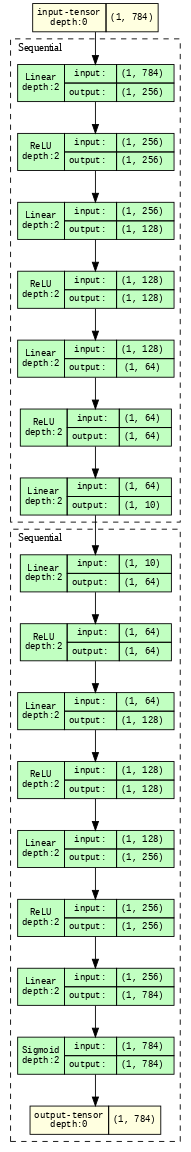

In [34]:
from torchview import draw_graph

model_graph = draw_graph(model, input_size=(1,28*28), expand_nested=True)
model_graph.visual_graph